# Ford GoBike System Data Visualization
## by Xiaowen Chen

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired. Resource link: https://s3.amazonaws.com/fordgobike-data/index.html

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from requests import get
from os import path, getcwd, makedirs, listdir
from io import BytesIO
from zipfile import ZipFile



%matplotlib inline


> Load in your dataset from url. Combine csvs and create a dataset.

In [2]:
#import all the csv files and join the data from the url.
folder_data = 'data'

makedirs(folder_data)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_data))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)

    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)

    # code below opens zip file; BytesIO returns a view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))

    # places extracted zip file into folder_data
    unzipped_file.extractall(folder_data)
    # Combine all downloaded CSVs into one 
list_data = []
for file_name in listdir(folder_data):
    list_data.append(pd.read_csv(folder_data+'/'+file_name))
df = pd.concat(list_data, join = 'inner', sort=True)

In [3]:

df.to_csv('data.csv')



In [4]:
df = pd.read_csv('data.csv',index_col=[0])

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [6]:
#There are 225,2058 observations  in the dataset with 15 columns.
df.shape

(2252058, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252058 entries, 0 to 131168
Data columns (total 15 columns):
bike_id                    int64
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(6)
memory usage: 274.9+ MB


In [8]:
df.isnull().sum()

bike_id                         0
duration_sec                    0
end_station_id              11579
end_station_latitude            0
end_station_longitude           0
end_station_name            11579
end_time                        0
member_birth_year          172248
member_gender              171818
start_station_id            11579
start_station_latitude          0
start_station_longitude         0
start_station_name          11579
start_time                      0
user_type                       0
dtype: int64

### What is the structure of your dataset?

> The dataset includes:

1. Bike IDs
2. How long was the bike rent for, in seconds
3. The information about end station ID, latitude, longitude and name.
4. The memeber's date of birth and gender
5. The information about start station ID, latitude, longitude and name.
6. The users' type as subscripted or not 


There are 2252058 rows and 15 columns of the dataset



### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the usage of bike in different user groups, such as different genders or ages. For example, users in different genders may gave different usage bahavior, and users in differnt ages may also have different usage behvaior. The usage behavior can be the duration of using bike, distances and subscribe or not. I am also intereted in when are most trips taken in terms of  day of the week and month of the year?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I assume the genders do not have much differences in usage bahaviors. I also assume people in different user types have different usage bahaviors.

## Data cleaning
### Before plotting the data, we need to do the data wrangling. We may need to clean the outliers and destract data.

In [9]:
#Make a copy before cleaning the data
df_clean = df.copy()

#### 1. Delete the rows with missing values in gender or birth year 

In [10]:
#Delete the rows without gender or birth year
df_clean.dropna(subset = ['member_birth_year', 'member_gender'], inplace=True)

In [11]:
#test
df_clean.isnull().sum()

bike_id                        0
duration_sec                   0
end_station_id             11257
end_station_latitude           0
end_station_longitude          0
end_station_name           11257
end_time                       0
member_birth_year              0
member_gender                  0
start_station_id           11257
start_station_latitude         0
start_station_longitude        0
start_station_name         11257
start_time                     0
user_type                      0
dtype: int64

#### 2. Convert birth year into the updated age. Check the age and remove the unreasonable ages such as -1, or greater than 117 (Verified oldest person in the world: https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people) 

In [12]:
#Create column for user's age
df_clean['member_age'] = 2020-df_clean['member_birth_year'].astype('int')

In [13]:
#Check for Outliers
df_clean['member_age'].max()


139

In [14]:
df_clean['member_age'].min()

20

20 is a reasonable age. 139 doesn't seem like a reasonable age. 

In [15]:
#remove users with age greater than 100
df_age_tooold = df_clean[df_clean['member_age'] > 100]
df_age_tooold

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
3754,3369,775,122.0,37.760299,-122.418892,19th St at Mission St,2018-02-28 08:15:37.0880,1911.0,Other,145.0,37.743684,-122.426806,29th St at Church St,2018-02-28 08:02:41.3960,Subscriber,109
4567,1788,363,144.0,37.747300,-122.411403,Precita Park,2018-02-27 20:16:12.4090,1911.0,Other,146.0,37.742314,-122.423181,30th St at San Jose Ave,2018-02-27 20:10:09.2030,Subscriber,109
6949,3671,369,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-27 11:02:23.1630,1900.0,Other,8.0,37.799953,-122.398525,The Embarcadero at Vallejo St,2018-02-27 10:56:14.1190,Customer,120
7189,1642,1826,202.0,37.800754,-122.274894,Washington St at 8th St,2018-02-27 09:58:31.8540,1900.0,Other,166.0,37.851376,-122.252523,College Ave at Alcatraz Ave,2018-02-27 09:28:05.5930,Customer,120
7287,2529,410,45.0,37.781752,-122.405127,5th St at Howard St,2018-02-27 09:46:03.5570,1902.0,Female,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-02-27 09:39:13.5100,Subscriber,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125865,3196,1596,166.0,37.851376,-122.252523,College Ave at Alcatraz Ave,2018-04-02 16:52:55.1400,1900.0,Other,250.0,37.874014,-122.283019,North Berkeley BART Station,2018-04-02 16:26:18.9850,Customer,120
126291,760,1403,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-04-02 15:21:26.2250,1900.0,Other,249.0,37.858473,-122.253253,Russell St at College Ave,2018-04-02 14:58:02.4610,Customer,120
127270,1713,354,134.0,37.752428,-122.420628,Valencia St at 24th St,2018-04-02 10:11:12.7190,1911.0,Other,140.0,37.747858,-122.424986,Cesar Chavez St at Dolores St,2018-04-02 10:05:18.1680,Subscriber,109
127486,1951,438,45.0,37.781752,-122.405127,5th St at Howard St,2018-04-02 09:39:55.0610,1902.0,Female,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-04-02 09:32:36.6240,Subscriber,118


In [16]:
#drop those with age greater than 100
df_clean = df_clean.drop(df_age_tooold.index, axis=0)

In [17]:
#test
df_clean[df_clean['member_age'] > 100]

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age


#### 3. Change data types. Change users gender and subscription as categorical type. Change ending time and starting time more readable (easier for a categorial visualization)

In [18]:
#change user_type and gender to category type
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

In [19]:
#change start_time and end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean = df_clean.sort_values(by='start_time')
#change duration_sec to minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60
#change duration_min to hours
df_clean['duration_hours'] = df_clean['duration_min'] / 60

In [20]:
# extract start time month 
df_clean['start_time_month']=df_clean['start_time'].dt.strftime('%B')
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')
#change both to category type
df_clean.start_time_month = df_clean.start_time_month.astype('category')
df_clean.start_time_weekday = df_clean.start_time_weekday.astype('category')

#### 4 According to the ending location and beginning location, we can calculate to get the distances for each observation

In [21]:
import math
def distance(begin, end):
    lat1, lon1 = begin
    lat2, lon2 = end
    radius = 3963 # in miles (resource: https://en.wikipedia.org/wiki/Earth_radius)
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d
df_clean['dis_miles'] = df_clean.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

In [22]:
#test
df_clean.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,...,start_station_longitude,start_station_name,start_time,user_type,member_age,duration_min,duration_hours,start_time_month,start_time_weekday,dis_miles
519697,240,424,48.0,37.782411,-122.392706,2nd St at S Park St,2017-06-28 09:54:41.187,1985.0,Female,21.0,...,-122.400811,Montgomery St BART Station (Market St at 2nd St),2017-06-28 09:47:36.347,Subscriber,35,7.066667,0.117778,June,Wed,0.621090
519698,669,366,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2017-06-28 09:53:47.715,1981.0,Male,58.0,...,-122.417385,Market St at 10th St,2017-06-28 09:47:41.664,Subscriber,39,6.100000,0.101667,June,Wed,0.127503
519699,117,188,48.0,37.782411,-122.392706,2nd St at S Park St,2017-06-28 09:52:55.338,1984.0,Male,25.0,...,-122.397405,Howard St at 2nd St,2017-06-28 09:49:46.377,Subscriber,36,3.133333,0.052222,June,Wed,0.376164
519692,77,1201,9.0,37.798572,-122.400869,Broadway at Battery St,2017-06-28 10:11:00.359,1985.0,Male,81.0,...,-122.393170,Berry St at 4th St,2017-06-28 09:50:59.175,Subscriber,35,20.016667,0.333611,June,Wed,0.995367
519696,316,431,321.0,37.780146,-122.403071,5th at Folsom,2017-06-28 10:03:51.090,1973.0,Male,66.0,...,-122.392741,3rd St at Townsend St,2017-06-28 09:56:39.631,Subscriber,47,7.183333,0.119722,June,Wed,0.716393


In [23]:
df_clean.to_csv('bike.csv')


In [24]:
bike = pd.read_csv('bike.csv',index_col=[0])
bike.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,...,start_station_longitude,start_station_name,start_time,user_type,member_age,duration_min,duration_hours,start_time_month,start_time_weekday,dis_miles
519697,240,424,48.0,37.782411,-122.392706,2nd St at S Park St,2017-06-28 09:54:41.187,1985.0,Female,21.0,...,-122.400811,Montgomery St BART Station (Market St at 2nd St),2017-06-28 09:47:36.347,Subscriber,35,7.066667,0.117778,June,Wed,0.621090
519698,669,366,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2017-06-28 09:53:47.715,1981.0,Male,58.0,...,-122.417385,Market St at 10th St,2017-06-28 09:47:41.664,Subscriber,39,6.100000,0.101667,June,Wed,0.127503
519699,117,188,48.0,37.782411,-122.392706,2nd St at S Park St,2017-06-28 09:52:55.338,1984.0,Male,25.0,...,-122.397405,Howard St at 2nd St,2017-06-28 09:49:46.377,Subscriber,36,3.133333,0.052222,June,Wed,0.376164
519692,77,1201,9.0,37.798572,-122.400869,Broadway at Battery St,2017-06-28 10:11:00.359,1985.0,Male,81.0,...,-122.393170,Berry St at 4th St,2017-06-28 09:50:59.175,Subscriber,35,20.016667,0.333611,June,Wed,0.995367
519696,316,431,321.0,37.780146,-122.403071,5th at Folsom,2017-06-28 10:03:51.090,1973.0,Male,66.0,...,-122.392741,3rd St at Townsend St,2017-06-28 09:56:39.631,Subscriber,47,7.183333,0.119722,June,Wed,0.716393


In [25]:
#https://github.com/geopandas/geopandas/issues/1166
#https://geodata.lib.berkeley.edu/catalog/ark28722-s7hs4j
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
#import geopandas as gpd
#from shapely.geometry import Point, Polygon

I was trying to draw the locations in the map, however, it cannot read my path...

In [26]:
#fp = "/Desktop/find_jobs/nano/visualization/s7hs4j.shp"

#SF_map  = gpd.read_file(fp)


## Univariate Exploration

### Gender visualization

In [27]:
 bike['member_gender'].value_counts()

Male      1532414
Female     503776
Other       30734
Name: member_gender, dtype: int64

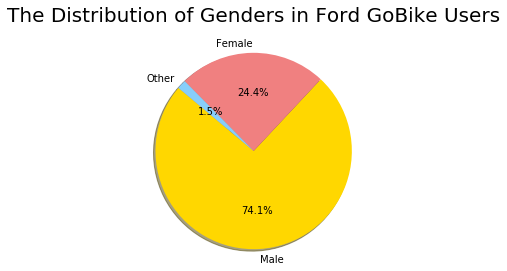

<Figure size 842.4x595.44 with 0 Axes>

In [28]:
# Data to plot
labels = 'Male', 'Female','Other'
sizes = [1532414, 503776, 30734]
colors = ['gold',  'lightcoral', 'lightskyblue']


# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("The Distribution of Genders in Ford GoBike Users", fontsize=20, y=1.07)
plt.axis('equal')
plt.show()
plt.gcf().set_size_inches(11.7, 8.27)

>  The majority of the users are males, at 74.1%. Few users filled in gender information as others.


### Age visualization

37.47745925829881

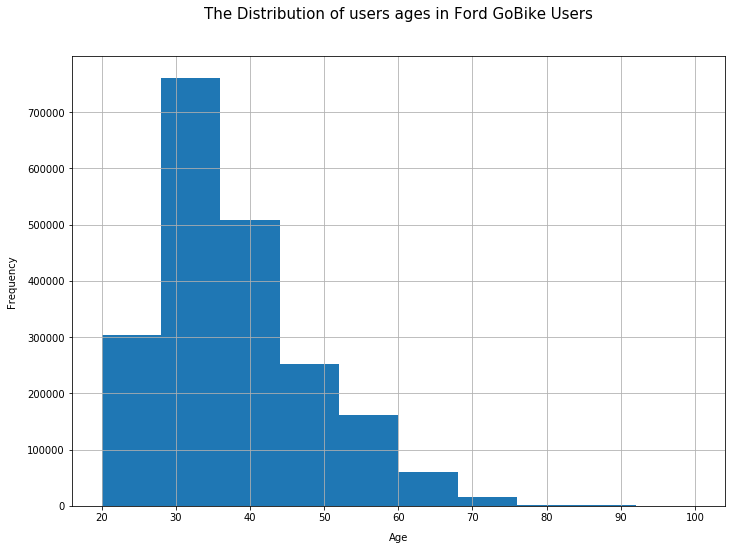

In [29]:
bike.hist(column='member_age');
plt.title("The Distribution of users ages in Ford GoBike Users", fontsize=15, y=1.07);
plt.xlabel("Age", fontsize=10, labelpad=10);
plt.ylabel("Frequency", fontsize=10, labelpad=10);
plt.gcf().set_size_inches(11.7, 8.27)

bike.member_age.mean()

The majority users are at the adult age. The avergae age is 37.48 years old.

### User type visualization

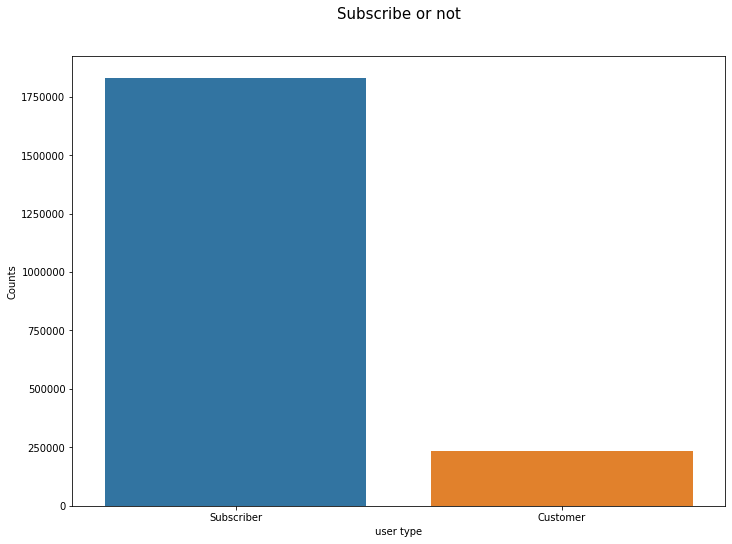

In [30]:

sb.countplot(data = bike, x = 'user_type')
plt.title("Subscribe or not", fontsize=15, y=1.07)
plt.xlabel('user type')
plt.ylabel('Counts');
plt.gcf().set_size_inches(11.7, 8.27)

Most of the users were subscribers. Less than 250,000 users are unsubscribed customers

### Distance visualization

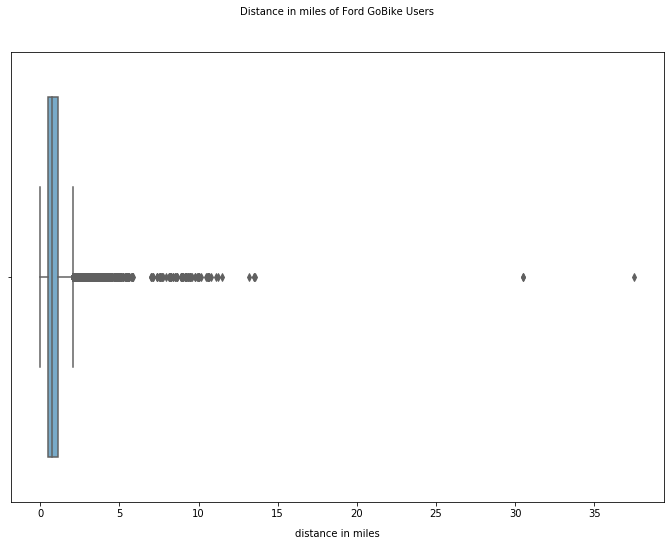

In [31]:
plt.figure(figsize=(14,6))
sb.boxplot(x='dis_miles', data=bike, palette='Blues')
plt.title("Distance in miles of Ford GoBike Users", fontsize=10, y=1.07)
plt.xlabel("distance in miles", fontsize=10, labelpad=10);
plt.gcf().set_size_inches(11.7, 8.27)

Since there are many outliers at the range of 5 to miles and some rale cases greater than 30 miles. I will set the bin edge and redo a visualization

0.8581141726788687

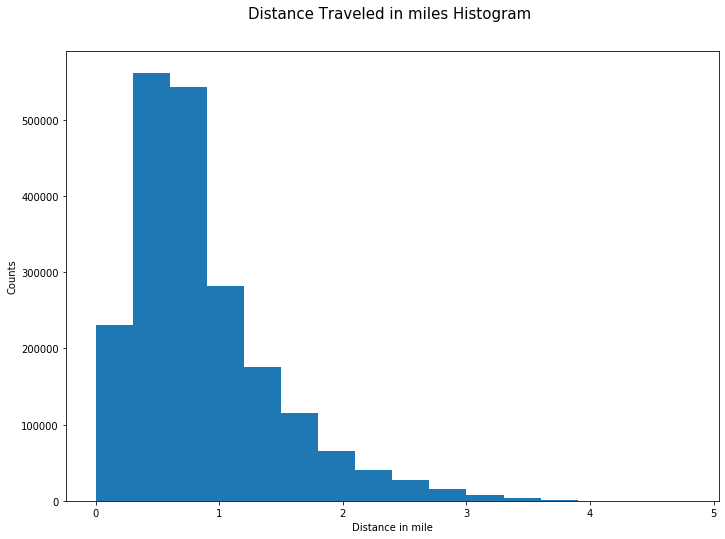

In [32]:
bin_edges = np.arange(0, 5, 0.3)
plt.hist(data = bike, x = 'dis_miles', bins = bin_edges)
plt.title("Distance Traveled in miles Histogram ", y = 1.06, fontsize = 15)
plt.xlabel('Distance in mile')
plt.ylabel('Counts');
plt.gcf().set_size_inches(11.7, 8.27)

bike.dis_miles.mean()

Most of the users used the bike for less than 1 mile. The average distances in miles in 0.86.

### Weekday usage visualization

In [33]:
 bike['start_time_weekday'].value_counts()

Tue    363396
Wed    359738
Thu    353039
Mon    330445
Fri    325750
Sat    177257
Sun    157299
Name: start_time_weekday, dtype: int64

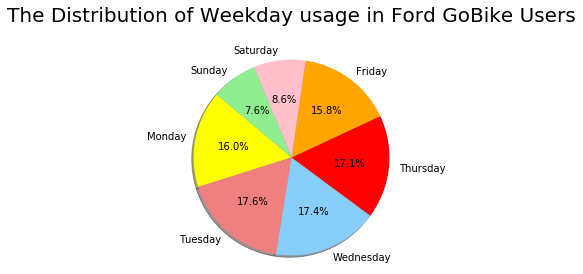

<Figure size 842.4x595.44 with 0 Axes>

In [34]:
# Data to plot
labels = 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
sizes = [330445, 363396, 359738,353039,325750,177257,157299]
colors = ['yellow',  'lightcoral', 'lightskyblue','red','orange','pink','lightgreen']


# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("The Distribution of Weekday usage in Ford GoBike Users", fontsize=20, y=1.1)
plt.axis('equal')
plt.show()
plt.gcf().set_size_inches(11.7, 8.27)

The users used bikes more frequenctly during the weekdays and the percentages are similar through Monday to Friday. 

### Monthly  usage visualization

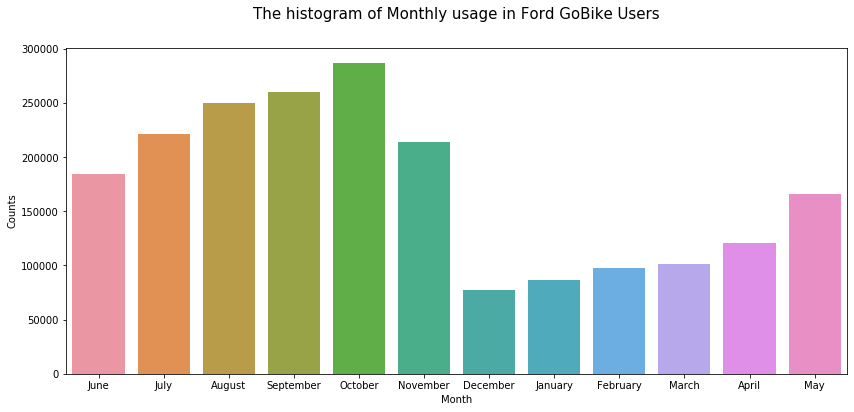

In [35]:
plt.figure(figsize=(14,6))
sb.countplot(data = bike, x = 'start_time_month')
plt.title("The histogram of Monthly usage in Ford GoBike Users", fontsize=15, y=1.07)
plt.xlabel('Month')
plt.ylabel('Counts');

According to the plot, October had the largest population of usage. It seems that people are using less during the winter.

### Usage duration visulization

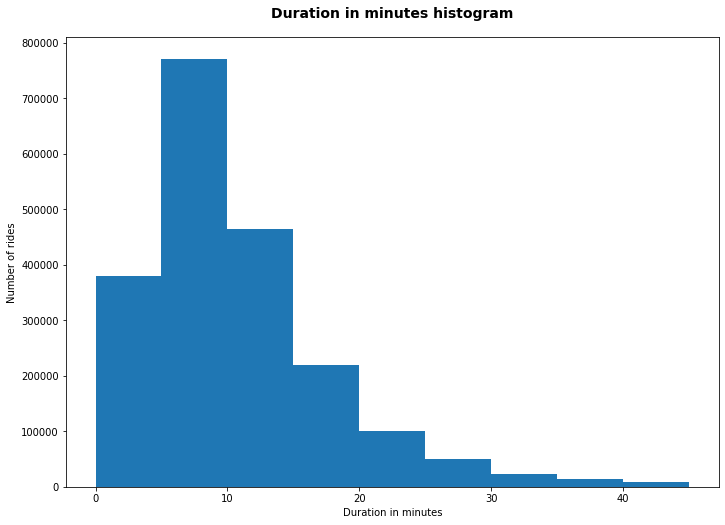

In [36]:
bin_edges = np.arange(0, 50, 5)

plt.hist(data = bike, x = 'duration_min', bins = bin_edges)

plt.title("Duration in minutes histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of rides');

bike.duration_min.mean()
plt.gcf().set_size_inches(11.7, 8.27)

Majority of the users used bike for less than 10 minutes. The average using time is 13.21 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>I cleaned the data before doing the plot. So in general, the plots look good and reasonable. Some details need to be changed. For the distrubution of distance in miles, few users had a greater than 30 miles riding. They look unusual. I may set the cut point in this situation. 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the age variable, some ages are too large, such as 139. This is definetly unreal age. few ages are greater than 100, so I dropped the users with age greater than 100 for a better visualization and analysis.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my
data. 
I will mainly take a look at the usage behaviors in different genders. 

### Gender and Age

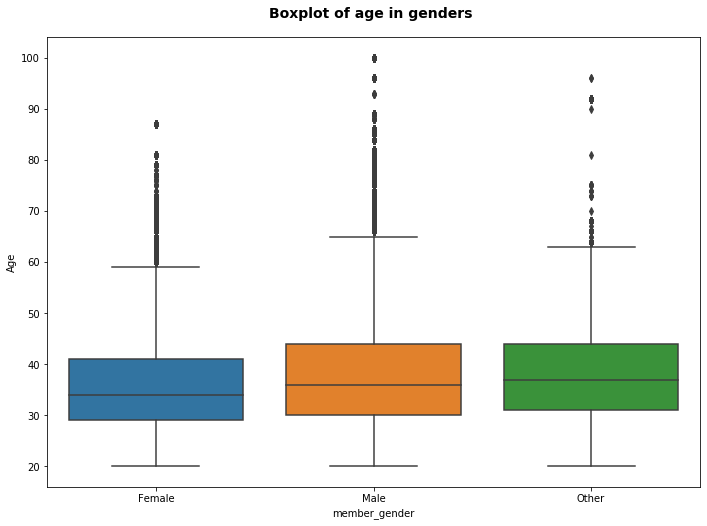

In [37]:
gender_age = sb.boxplot(x="member_gender", y="member_age", data=bike,
                 order=["Female", "Male",'Other'])
plt.title("Boxplot of age in genders ", y=1.03, fontsize=14, fontweight='semibold')
plt.ylabel('Age');
plt.gcf().set_size_inches(11.7, 8.27)

In the dataset, the male users mean age is slightly higer than female's mean age.

### Gender and Usage duration in minutes

In [38]:
#remove abnormal duration
df_duration_abnormal = bike[bike['duration_min'] > 30]
df_duration_abnormal
bike_1 = bike.drop(df_duration_abnormal.index, axis=0)

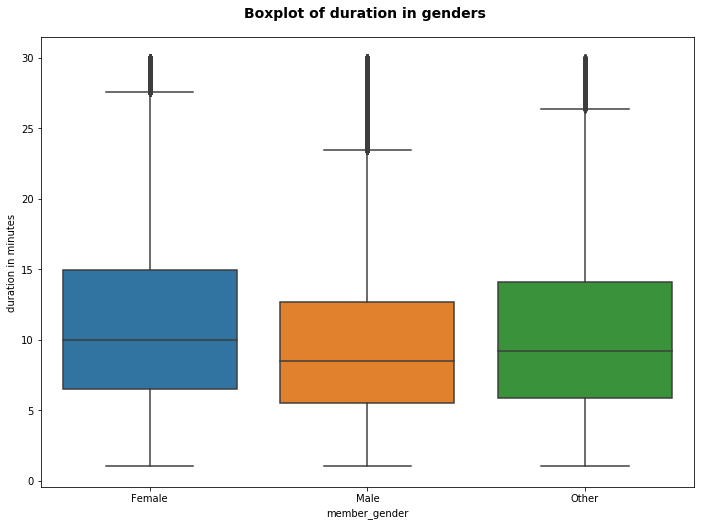

In [39]:

gender_minutes = sb.boxplot(x="member_gender", y="duration_min", data=bike_1,
                 order=["Female", "Male",'Other'])
plt.title("Boxplot of duration in genders ", y=1.03, fontsize=14, fontweight='semibold')
plt.ylabel('duration in minutes');
plt.gcf().set_size_inches(11.7, 8.27)

In general, females are using the bike for a slightly longer time than males in mean. Duration mean in other genders are slighter higher than males and lower than females.

### Gender and Usage distance in miles

In [40]:
#remove abnormal distance
df_distance_abnormal = bike[bike['dis_miles'] > 3]
df_distance_abnormal
bike_2 = bike.drop(df_distance_abnormal.index, axis=0)

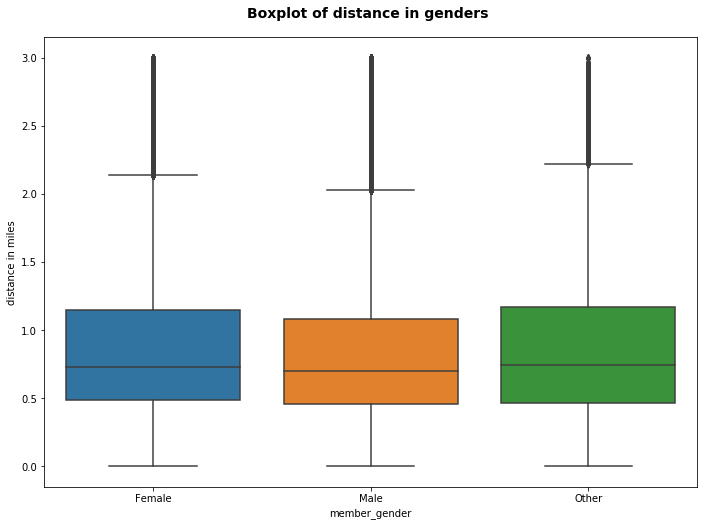

In [41]:

gender_miles = sb.boxplot(x="member_gender", y="dis_miles", data=bike_2,
                 order=["Female", "Male",'Other'])
plt.title("Boxplot of distance in genders ", y=1.03, fontsize=14, fontweight='semibold')
plt.ylabel('distance in miles');
plt.gcf().set_size_inches(11.7, 8.27)

In general, the genders have very similar distance in miles. Females are using the bike for a slightly longer distance in mean than males. 

### Gender and Weekday usge 

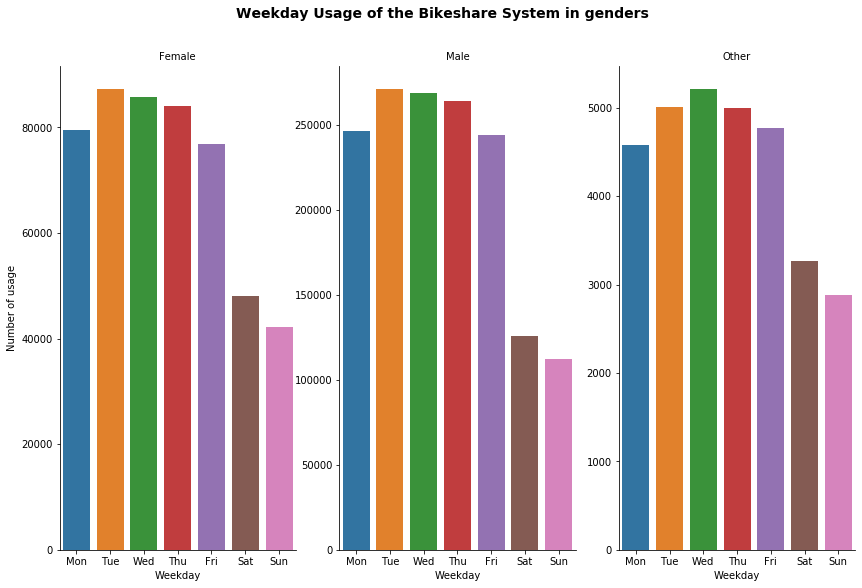

In [42]:
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=bike, x='start_time_weekday', col="member_gender", kind='count', sharey = False, order = week)
g.set_axis_labels("Weekday", "Number of usage")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System in genders', y=1.03, fontsize=14, fontweight='semibold');
plt.gcf().set_size_inches(11.7, 8.27)

 The distributions in different gender group do not have significant difference. The users used bikes more frequenctly during the weekdays and the percentages are similar through Monday to Friday.

### Gender and Monthly usage

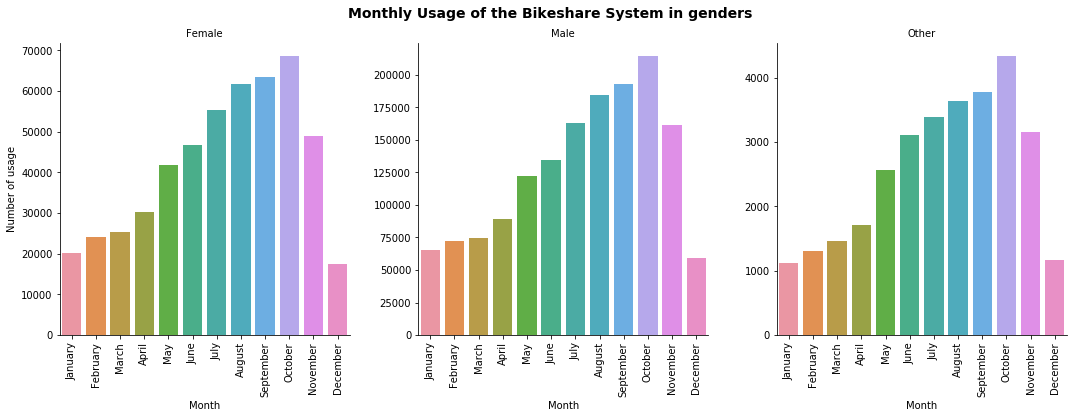

In [43]:
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']
g = sb.catplot(data=bike, x='start_time_month', col="member_gender", kind='count', sharex = True,sharey = False, order = month)
g.set_axis_labels("Month", "Number of usage")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Usage of the Bikeshare System in genders', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=90);

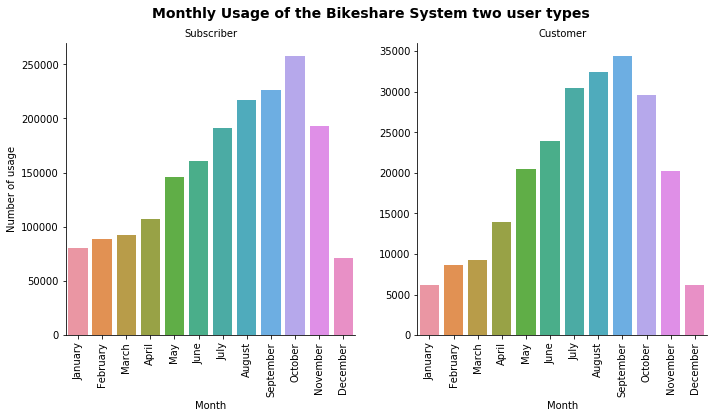

In [44]:
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']
g = sb.catplot(data=bike, x='start_time_month', col="user_type", kind='count', sharex = True,sharey = False, order = month)
g.set_axis_labels("Month", "Number of usage")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Usage of the Bikeshare System two user types', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=90);

 The distributions in different gender group do not have significant difference. They have a similar trend to their monthly usage, where it increases from spring and fall until it drops in November, and for the remainder of the winter. The most popular usage month for customers is October. The most popular month for subscribers is also October.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There isn't any obvious diffrences between genders in weekly usage and monthly usage. Females have a greater mean on the duration of usage than males. There is not an obvious difference between genders in distances.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  In addition, in monthly usage,  the distribution in customers and subscribers is slightly different. The most popular usage month for customers is October. The most popular month for subscribers is also October. 

## Multivariate Exploration

First, I will analyze the distributions between duration time, based on genders and weekday usage.

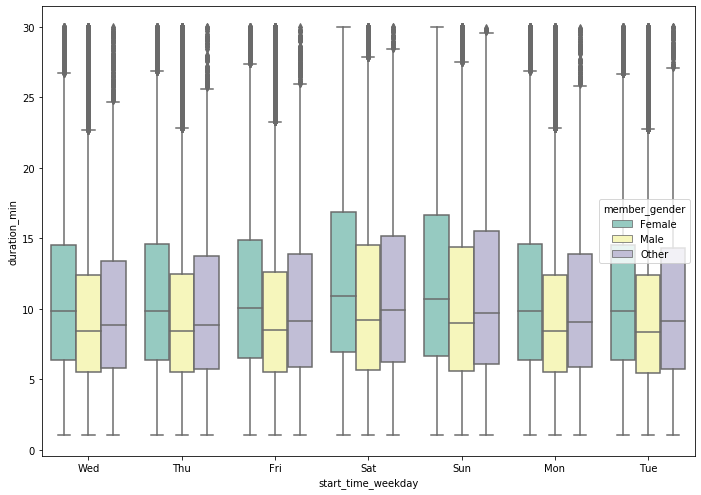

In [45]:
sb.boxplot(x="start_time_weekday", y="duration_min", hue="member_gender",
                 data=bike_1, palette="Set3")
plt.gcf().set_size_inches(11.7, 8.27)

The boxplot showed that during all the weekdays, females are using the bike for a longer time than males and other group. On Saturaday and Sunday, the average duration in all genders groups is higher than the avergae duration in weekdays; the 75 percentile duration in all genders groups is higher than the avergae duration in weekdays.

Then, I will analyze the distributions between distance in miles, based on genders and subscriber.

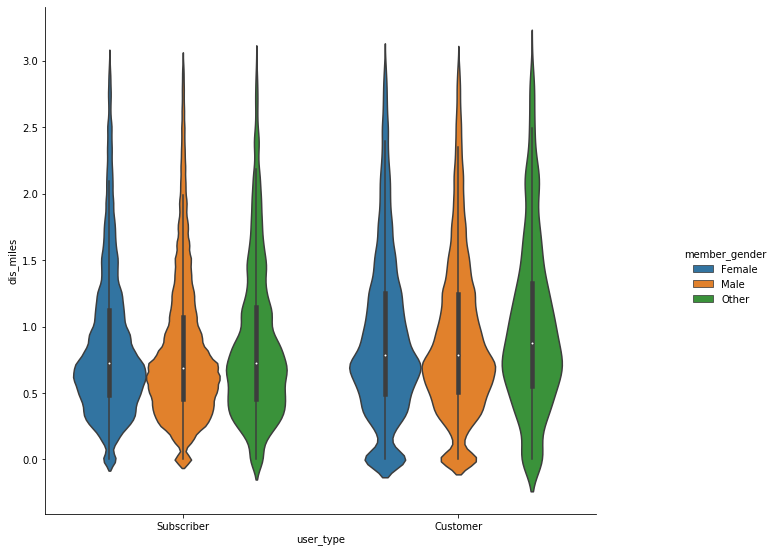

In [46]:

# figure size in inches

sb.catplot(x="user_type",y="dis_miles", hue="member_gender", data=bike_2,kind="violin")
plt.gcf().set_size_inches(11.7, 8.27)

The users in all the gender groups and what ever subsribed or not have a right screw distribution on distances in miles. For the users in customer groups, it seems that more people in female and male group have a lower disances comparing to the number of people other gender groups. For the all the users in customer groups what ever their genders are,there more people located in the lower distances than the users in subscriber group.

Further, I will analyze the distributions between distances in miles, based on genders and weekday usage.

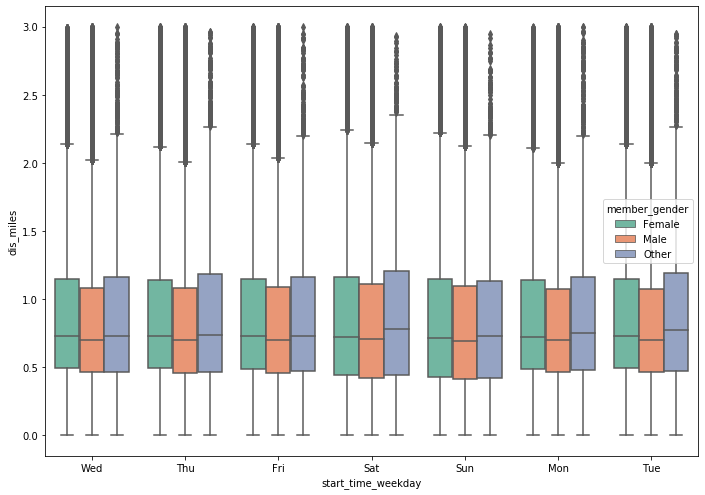

In [47]:
sb.boxplot(x="start_time_weekday", y="dis_miles", hue="member_gender",
                 data=bike_2, palette="Set2")
plt.gcf().set_size_inches(11.7, 8.27)

It is obviously that there are no differences between weekdays in all gender groups in terms of distance.

In the end, I will plot a heatmap to see which day of the month is most popular bike using in females and males.

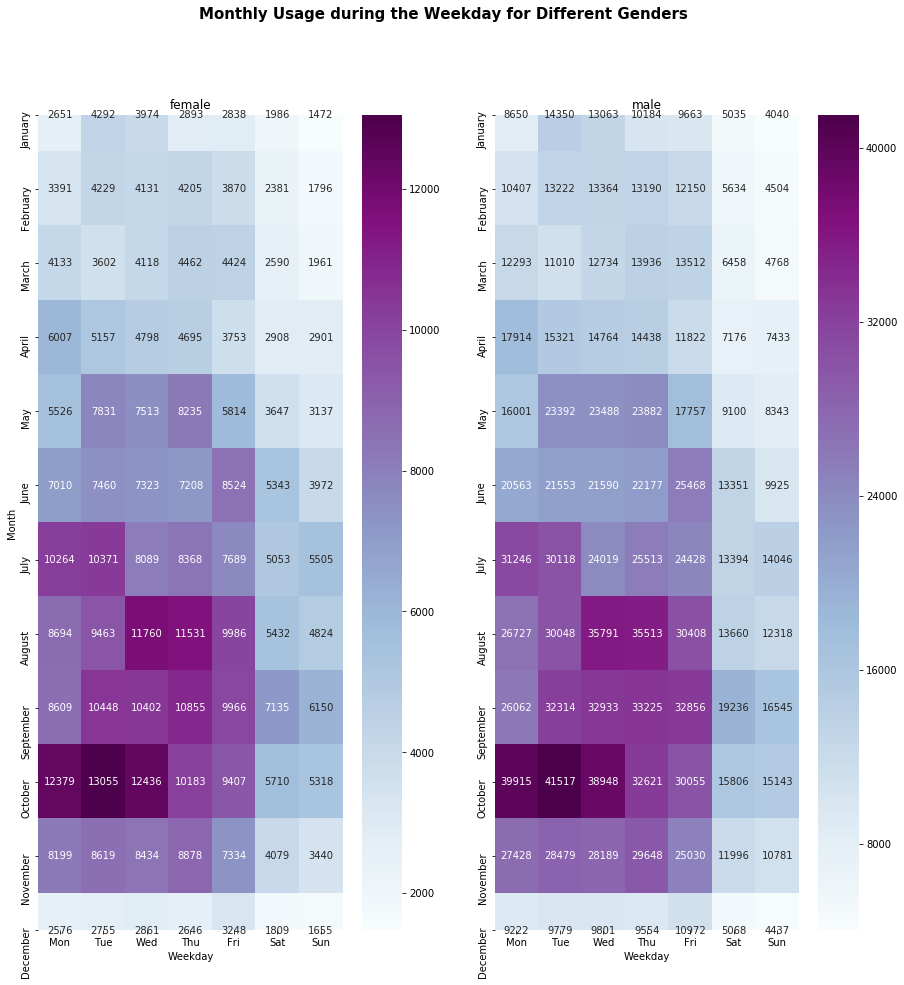

In [48]:
# Setting the weekday order
bike['start_time_weekday'] = pd.Categorical(bike['start_time_weekday'],
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
                                                ordered=True)
bike['start_time_month'] = pd.Categorical(bike['start_time_month'],
                                                categories=['January','February','March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December'],
                                                ordered=True)
plt.figure(figsize=(15,15))
plt.suptitle('Monthly Usage during the Weekday for Different Genders', fontsize=15, fontweight='semibold')

# heatmap for females
plt.subplot(1, 2, 1)
df_female = bike.query('member_gender == "Female"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_female = df_female.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_female, annot=True, fmt="d",cmap="BuPu")

plt.title("female", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Month');
# heatmap for males
plt.subplot(1, 2, 2)
df_male = bike.query('member_gender == "Male"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_male = df_male.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_male, annot=True, fmt="d",cmap="BuPu")

plt.title("male", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

When the color became darker, there are more users are using the bike on that particular week during that particular month. Most females are using bike on the Tuesdays in October. Most males are using bike on the Tuesdays in Octorber as well.

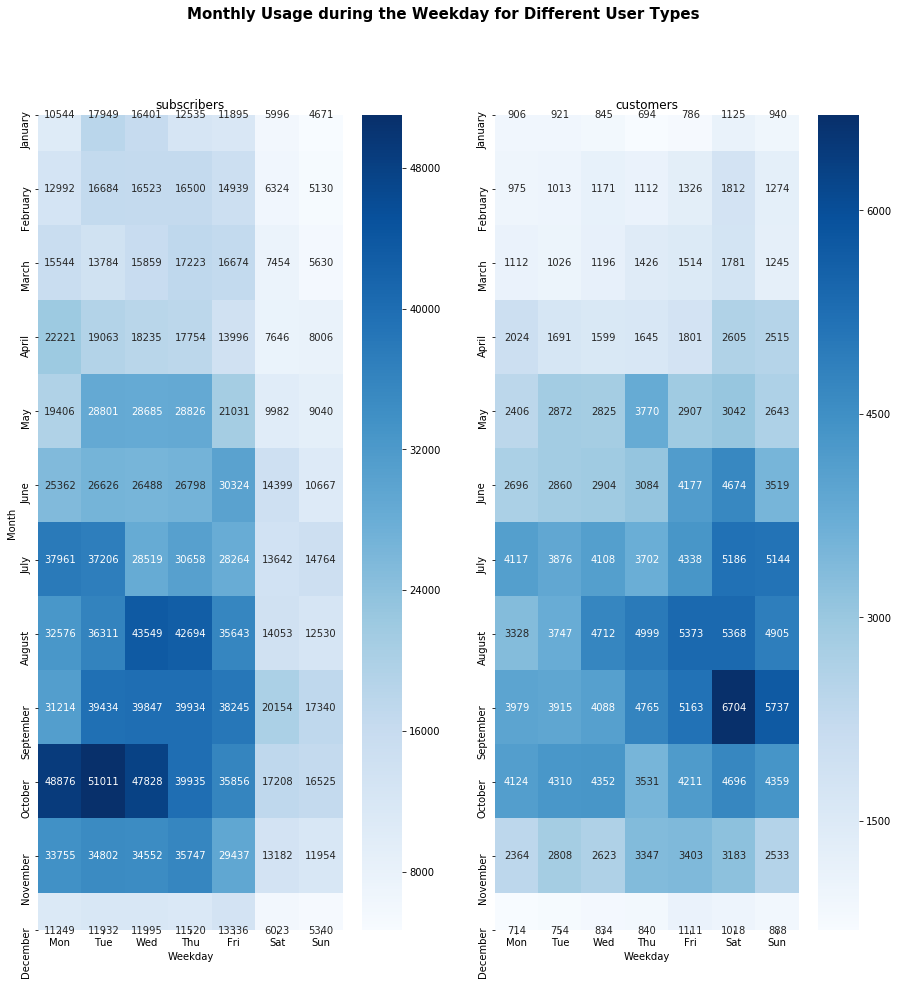

In [49]:
plt.figure(figsize=(15,15))
plt.suptitle('Monthly Usage during the Weekday for Different User Types', fontsize=15, fontweight='semibold')

# heatmap for subscribers
plt.subplot(1, 2, 1)
df_sub = bike.query('user_type == "Subscriber"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_sub = df_sub.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_sub, annot=True, fmt="d",cmap="Blues")

plt.title("subscribers", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Month');
# heatmap for customers
plt.subplot(1, 2, 2)
df_cus = bike.query('user_type == "Customer"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_cus = df_cus.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_cus, annot=True, fmt="d",cmap="Blues")

plt.title("customers", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

It is obvious that people in different user types have different usage bahavior. The darker the block is, more rides are occuring.  Most subscribed users are using bikes on the Tuesdays in October and most customers are using bikes on the Saturdays on September. In both groups, people are using bikes fewer during winter seasons. The summer and fall are the most popular for both users. Subscribers are using bikes during weekdays more frequently than customers. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>The multivariate charts helped to confirm some previous observations. Gender is not an obvious variable to determine the differences. The usage behaviors between genders are extremely similar.
### Were there any interesting or surprising interactions between features?

>  The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on Monday-Friday, the most. This was not influenced by gender. Most subscribed users are using bikes on the Tuesdays in October and most customers are using bikes on the Saturdays on September. In both groups, people are using bikes fewer during winter seasons.


References:
https://stackoverflow.com/questions/36519086/how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe
https://github.com/geopandas/geopandas/issues/1166
https://geodata.lib.berkeley.edu/catalog/ark28722-s7hs4j
https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
https://geopandas.org/projections.html